In [1]:
#引用函數
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
# Import data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST", one_hot=True)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 

Extracting ./MNIST\train-images-idx3-ubyte.gz
Extracting ./MNIST\train-labels-idx1-ubyte.gz
Extracting ./MNIST\t10k-images-idx3-ubyte.gz
Extracting ./MNIST\t10k-labels-idx1-ubyte.gz


In [3]:
print (type(mnist))
print (mnist.train.num_examples)
print (mnist.validation.num_examples)
print (mnist.test.num_examples)


<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
55000
5000
10000


In [5]:
print("讓我們看一下 MNIST 訓練還有測試的資料集長得如何")
train_img = mnist.train.images
train_label = mnist.train.labels
test_img = mnist.test.images
test_label = mnist.test.labels
print
print(" train_img 的 type : %s" % (type(train_img)))
print(" train_img 的 dimension : %s" % (train_img.shape,))
print(" train_label 的 type : %s" % (type(train_label)))
print(" train_label 的 dimension : %s" % (train_label.shape,))
print(" test_img 的 type : %s" % (type(test_img)))
print(" test_img 的 dimension : %s" % (test_img.shape,))
print(" test_label 的 type : %s" % (type(test_label)))
print(" test_label 的 dimension : %s" % (test_label.shape,))

讓我們看一下 MNIST 訓練還有測試的資料集長得如何
 train_img 的 type : <class 'numpy.ndarray'>
 train_img 的 dimension : (55000, 784)
 train_label 的 type : <class 'numpy.ndarray'>
 train_label 的 dimension : (55000, 10)
 test_img 的 type : <class 'numpy.ndarray'>
 test_img 的 dimension : (10000, 784)
 test_label 的 type : <class 'numpy.ndarray'>
 test_label 的 dimension : (10000, 10)


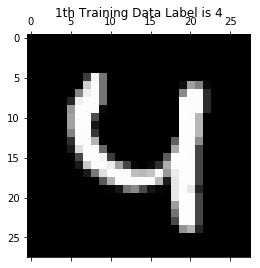

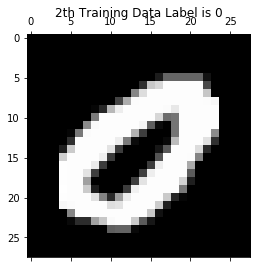

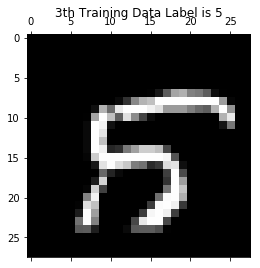

In [12]:
trainimg = mnist.train.images
trainlabel = mnist.train.labels
nsample = 1
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in [0, 1, 2]:
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(trainlabel[i, :] ) # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i + 1) + "th Training Data " 
              + "Label is " + str(curr_label))

In [11]:
#引用函數
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
# Import data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST", one_hot=True)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Extracting ./MNIST\train-images-idx3-ubyte.gz
Extracting ./MNIST\train-labels-idx1-ubyte.gz
Extracting ./MNIST\t10k-images-idx3-ubyte.gz
Extracting ./MNIST\t10k-labels-idx1-ubyte.gz


In [6]:
#變數宣告

learning_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])


In [7]:
###Softmax 模型###

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))

train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict = {x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

print(sess.run(y[0,:], feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))

0.9083
[  2.86470322e-06   7.51847806e-10   9.80954951e-07   2.38924677e-05
   1.40313716e-07   1.61313153e-06   1.31827429e-08   9.99889851e-01
   1.70333044e-06   7.89345650e-05]


In [19]:
###CNN###
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)
def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

#第一個卷積層
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

#第二個卷積層
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#密集的全連接層
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#輸出層
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

#訓練以及評估模型
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(session=sess, feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(session=sess, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(session=sess, feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.08
step 100, training accuracy 0.94
step 200, training accuracy 0.98
step 300, training accuracy 0.88
step 400, training accuracy 0.88
step 500, training accuracy 0.92
step 600, training accuracy 0.96
step 700, training accuracy 0.98
step 800, training accuracy 0.92
step 900, training accuracy 0.92
test accuracy 0.9609
